In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# os.getcwd()

In [144]:
train_df = pd.read_csv("/USER/3_WEEK/MNC_NLP/train/train.csv")
train_df

,title,comment,bias,hate
0,"""'미스터 샤인션' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none
...,...,...,...,...
8362,"""배우 이필립, SNS 스타 연인에게 초호화 프러포즈 눈길""",아니 근데.튜닝한사람은 프러포즈받지도.결혼도못함?ㅋㅋㅋ지들은 돈없어서 못하는것들이ㅋ...,others,hate
8363,"""[SC이슈]""""마약·백스텝·김새롬 탓"""" '실형 피한' 이찬오, 이미지는 치명상(...",그러니깐 여자를 잘만나야되~징글징글한것들 만나면 인생 끝가지 돌아가게 되는듯.. 근...,gender,hate
8364,"""[POP이슈]""""그들만의 세상""""…홍상수♥김민희, 새해데이트에 '반응싸늘'""",참으로 아름다운 커플입니다. 늘 행복하시고 새해에도 늘 꽃길만 걸으시길 축원합니다 ...,none,none
8365,[종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등,재미가 없어요,none,none


In [ ]:
LABEL_DIC = {
    'none': 0,
    'offensive': 1,
    'hate': 2,
}
LABEL_DIC = {
    'none': 0,
    'others': 1,
    'gender': 2,
}

In [154]:
copy_data = pd.read_csv("/USER/3_WEEK/MNC_NLP/submission.csv")
copy_data["label"].value_counts()

0    405
1    334
2    235
Name: label, dtype: int64

In [150]:
for i in range(len(test_df)):
    print(test_df.iloc[i]["comment"])
    break
    if "둘다 넘 좋다~행복하세요" in train_df.iloc[i]["comment"]:
        print(i)
        break

둘다 넘 좋다~행복하세요


In [63]:
train_df2 = pd.read_csv("/USER/3_WEEK/MNC_NLP/train/Dataset.csv")
train_df2

,content\tlable
0,이종석 한효주 나오는 드라마 이후로 드라마 안봤다. 2년전인가?? 좀 신선했었지. ...
1,씨바알..노무노무 술프노... 오늘 저녁은 꽂등심이다ㅠㅜ\t0
2,짱깨 꺼라ㅡ패쓰\t0
3,그들의 사생활 ~ 고인이된 설리를 위해서라도 모두 조용하길 지금 누굴 탓한다고 무슨...
4,아무리 법이 뭣같아도 무슨 자격으로 개인의 신상정보를 불특정 다수에게 공개하는지 도...
...,...
9995,이거 보다 더한 막장의 드라마도 넋놓고 보면서 무슨?\t1
9996,머...제네시스..올라프에디션?\t1
9997,항상 여자로 ㅡ ㅡ 저지랄 들이야 남자들 벗겨봐라\t0
9998,첫번째 이유가 ㄹㅇ 맞지특히나 뉴스나 기사 몇줄읽은 학생들끼리 대화해도 서로 존나 ...


In [21]:
print("classes of bias : ",df_train["bias"].unique())
print("classes od hate : ",df_train["hate"].unique())

classes of bias :  ['none' 'others' 'gender']
classes od hate :  ['none' 'hate']


In [22]:
pd.crosstab(df_train.bias, df_train.hate, margins=True)

hate,hate,none,All
bias,,,
gender,1216,83,1299
none,2068,3422,5490
others,1437,141,1578
All,4721,3646,8367


In [19]:
bias = dict(df_train["bias"].value_counts())
hate = dict(df_train["hate"].value_counts())

In [20]:
bias, hate

({'none': 5490, 'others': 1578, 'gender': 1299}, {'hate': 4721, 'none': 3646})

In [147]:
test_df = pd.read_csv("/USER/3_WEEK/MNC_NLP/test/test.csv")
test_df

,ID,title,comment
0,0,"류현경♥︎박성훈, 공개연애 4년차 애정전선 이상無..""의지 많이 된다""[종합]",둘다 넘 좋다~행복하세요
1,1,"""현금 유도+1인 1라면?""…'골목식당' 백종원, 초심 잃은 도시락집에 '경악' [종합]",근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데
2,2,"입대 D-11' 서은광의 슬픈 멜로디..비투비, 눈물의 첫 체조경기장[콘서트 종합]",누군데 얘네?
3,3,"아이콘택트' 리쌍 길, 3년 전 결혼설 부인한 이유 공개…""결혼,출산 숨겼다""","쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ..."
4,4,"구하라, 안검하수 반박 해프닝...""당당하다""vs""그렇게까지"" 설전 [종합]",안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...
...,...,...,...
506,506,"[N이슈] 최율, 조재현 성추행 의혹 폭로… 소속사 ""상황 파악 중""",얜 그냥 봐도 아니다 ㅋ 고소당하면 어마어마한 금액 물어줘야할껄?
507,507,"해투4' 이서진, 한지민 '대본 리딩 격리설' 해명…""날씨가 좋아서"" [SC컷]",대박 게스트... 꼭 봐야징~ 컨셉이 바뀌니깐 재미지넹
508,508,"[SS인터뷰①]박민영 ""'김비서' 행복했다..열애설엔 당당..미소였으니까""",성형으로 다 뜯어고쳐놓고 예쁜척. 성형 전 니 얼굴 다 알고있다. 순자처럼 된장냄새...
509,509,"[POP이슈]""사실무근"" 'SKY캐슬' 측 '위올라이' 표절설 부인→여전히 '핫'(종합)",분위기는 비슷하다만 전혀다른 전개던데 무슨ㅋㅋㄱ 우리나라사람들은 분위기만 비슷하면 ...


![image](https://cdn.discordapp.com/attachments/940518751974080532/946592587886772304/2022-02-25_11.20.55.png)

In [27]:
# 두 라벨의 가능한 모든 조합 만들기
combinations = np.array(np.meshgrid(train_df.bias.unique(), train_df.hate.unique())).T.reshape(-1,2)

print(combinations)

[['none' 'none']
 ['none' 'hate']
 ['others' 'none']
 ['others' 'hate']
 ['gender' 'none']
 ['gender' 'hate']]


In [42]:
# bias, hate 컬럼을 합친 것
bias_hate = list(np.array([train_df['bias'].values, train_df['hate'].values]).T.reshape(-1,2))

print(bias_hate[:5])
print(len(bias_hate))
print(len(train_df))

[array(['none', 'none'], dtype=object), array(['none', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['none', 'none'], dtype=object), array(['none', 'none'], dtype=object)]
8367
8367


In [29]:
labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

train_df['label'] = labels
train_df.head()

,title,comment,bias,hate,label
0,"""'미스터 샤인션' 변요한, 김태리와 같은 양복 입고 학당 방문! 이유는?""",김태리 정말 연기잘해 진짜,none,none,0
1,"""[SC현장]""""극사실주의 현실♥""""…'가장 보통의 연애' 김래원X공효진, 16년만...",공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,"""손연재, 리듬체조 학원 선생님 """"하고 싶은 일 해서 행복하다""""""",누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate,3
3,"""'섹션TV' 김해숙 """"'허스토리' 촬영 후 우울증 얻었다""""""",일본 축구 져라,none,none,0
4,"""[단독] 임현주 아나운서 “‘노브라 챌린지’ 방송 덕에 낸 용기, 자연스런 논의의...",난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none,0


0 ['none' 'none']
1 ['none' 'hate']
2 ['others' 'none']
3 ['others' 'hate']
4 ['gender' 'none']
5 ['gender' 'hate']


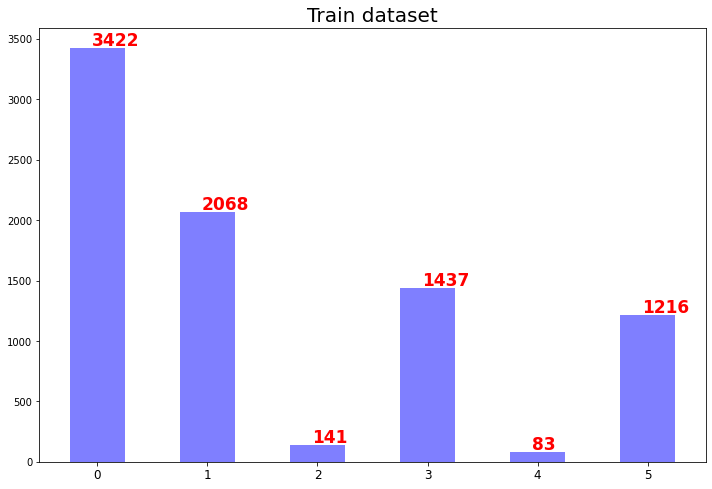

In [142]:
feature = train_df['label']

plt.figure(figsize=(10,7.5))
plt.title('Train dataset', fontsize=20)

temp = feature.value_counts()

font1 = {
    'color':  'red',
    'weight': 'bold',
    'size': 17,
}
# print(type(temp))
# temp = dict(temp)
# print(temp)
for idx, line in enumerate(combinations):
    print(idx,line)
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)

plt.text(-0.05, temp.values[0]+20, s=temp.values[0],fontdict=font1)
plt.text(0.95, temp.values[1]+20, s=temp.values[1],fontdict=font1)
plt.text(1.95, temp.values[4]+20, s=temp.values[4],fontdict=font1)
plt.text(2.95, temp.values[2]+20, s=temp.values[2],fontdict=font1)
plt.text(3.95, temp.values[5]+20, s=temp.values[5],fontdict=font1)
plt.text(4.95, temp.values[3]+20, s=temp.values[3],fontdict=font1)

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [128]:

count = 0
for i in range(len(train_df)):
    if train_df.iloc[i]["label"] == 4:
        count += 1
        print(train_df.iloc[i]["comment"])
print(count)

여자는 얼굴보다 요리실력. 근데 얼굴도 이쁘심.
남자가 얼마나 속상했으면 저럴까... 같은 잘생기고 멋진 남자로서 이해한다
역시 여자는 나이가 깡패다 깡패 .
전현무 KBS전 아나운서, 진짜 부럽다 92년생 나이차도 한창나는 여친이라니
조민기 안테 피해당했다는데 실체는 없구만..피해자가 직접나서서 고소한것도 아니고 온통 찌라시만 가득.. 저렇게 외도 했다고 하는데 아내가 저럴정도로 애정했을까? 라는 의문투성이.
저렇게 눈큰 여자는 눈작은남자를 좋아한다 눈작은남자가 잘생겨보인다 내가그렇다
여자들이 지금 이때다하고 욕하는중 ㅋㅋㅋ
여자가 아깝지
솔직히 시집잘갔잖아부럽긴하지
임신만 안하면 속도위반이 아닌건가? 아니면 속도위반은 했지만 단속은 피했다는 것인가? 말도 생각하면서 조심했으면
한국여자들이 욕하는걸 보니까 송혜교씨 정말 훌륭한 사람이시네요 응원합니다
다들 심심한가봐요 사실일수도 거짓일수도있는거아니예요 그여자 한만디에 모든게사실이 되나요? 오달수씨 불쌍...
여자는 역시 널널한 와이셔츠 입었을 때가 제일 좋아.ㅎㅎ 김지원 너무 예쁘다.ㅎㅎ
남자가 그럴수도 있지 배포 있네 요즘 세상에
처음 본 여자한테 찝적 거렸는데, 여자가 기분 나빳다 ? 이게 죄야 ? 성적 발언을 한 것도 아니고, 상대가 기분이 나쁘면 무조건 피해자로 규정하나 ? 이건 아니지 싶다 ㅋㅋㅋ
첫번째 사진 디게 건방지네..남자를 아래로 보는구만
여자들도 아무한테나 자기야라고하는사람있는데 그것도성희롱인것같은데요
솔직히 아쉬울게 머잇냐오창석정도면 어디가서보기힘든 훈남인데팅기지말고 만나라
기센여자랑살려면 바보가되야됨
이제 시집좀가자!!!
육지담이 응원한다. 스타되니깐 연락안받고 그런건가? 예로부터 조강지처한테 잘해야 한다고했었는데. 아쉽다 . 물론 육지담이 조강지처인지는모르겠으나.
그래도 남자로서 부럽네...잘생겨서 항상 인기 많은듯
이국주 욕하지마.... 그래도 여자로서 망가지면서 웃긴다는게 얼마나 힘든건데.. 난 박나래가 더 웃겨도 인간적으론 이국주가 더 끌리던데... 이국주도 사람이고 여자야 무조

In [129]:

count = 0
for i in range(len(train_df)):
    if train_df.iloc[i]["label"] == 5:
        if count >= 50:
            break
        print(train_df.iloc[i]["comment"])
        count += 1
print(count)

아이는 대부분 엄마가 원해서낳고 독박육아하고남편은 그냥 따라고는 수준!싫은 내색도 못하고 심지어 부담스러워하더라!
한동안 곧휴가 즐겁겠구나 부럽다 만석아
서울대 이혜성 >>>>>> 넘사 >>>>>>> 동덕여대 한혜진. 전현무도 결혼할 나인데 현명하게 판단한거임
여자가 나이 많으면 이혼율 높은거 RG?
유명인은 결혼 하다가 이혼하면 재상 반띵 해줘야 하는뎅..그냥 혼자 살면서 20대초 모델이나 레이싱걸들 따먹으면서 사는게 훨 낫지..
성질드러운깜둥이년나왓네 이년이 성격만좋앗으면 제1의 한현민이엇을건데
세븐걸린거 넌잘피해갓지. ㅋ다 그놈이그놈인데
여자들은 왜 똥싸면서 스마트폰으로 페북을보나요?
계집이란 어차피 사내의 손을 타게되는것을.. 그리고 사내로 태어나서 계집질도 하는거지. 계집년 한두명때문에 대한민국 영화계 거물하나가 또 사라지는구나!
여자들은 반성해라 60넘는 돼지들이여
aoa가 걸그룹으로 가치고 있음? ㅋㅋㅋ요즘 아이돌은 20살만 넘어도 늙은거임 ㅋㅋㅋ 아이즈원 장원영 안유진 ITZY 유나같은애들 봐라 17살이니까 존나쩔지 ㅋㅋㅋ여자는 무조건 어린게 최고임
돼지뱐태 천생 아줌마 지 어미 닮아 돼지년이지 뭐‼️‼️‼️
일본 싫어하면서 일본AV는 ㅈㄴ 좋아하지? 역시 미개한 한국남자들
여자 입은 오랄하라고 있는건디...
여기 ㅈㄴ웃긴 게 비난하는 욕도 없고 그냥 18키로 찌우다니 대단하다란글밖에 없는데댓글이 찔리는 건지 누가봐도 여자라 그러네그러니까 안 먹어도 되는 욕을 먹는 거다 페미들아
솔직히 마약하는것보다 성폭행이 더쪽팔린죄다 빵안에서도 강간범들은 인간취급안한다하더라 ..
문제가 많은여자네
저거 가정폭력아닌가요? 바람난게 아니라면 뭐가 문제에요? 그냥 이성이랑 대화만해도 막 의심했나 보네;;
저 정도 몸매는 길거리에 널리고 널렸지... 그냥 오크돼지줌마들의 워너비 ㅉㅉㅉㅉ
송윤형 남자가 너무 하네ㅋㅋㅋㅋㅋ 데이지만 새됐어ㅠㅠㅠㅠㅠ 펜타곤 이던이 남자네ㅋㅋ
몇년전 전라디언 냔 먹은적 있는데 아가리엔 똥내,아랫도리는 홍어 장난 아니더구만~~냄새 쩐다 쩌러

In [110]:
# bias, hate 컬럼을 합친 것
bias_hate = list(np.array([submit['bias'].values, submit['hate'].values]).T.reshape(-1,2))

print(bias_hate[:5])
print(len(bias_hate))
print(len(test_df))

[array(['none', 'none'], dtype=object), array(['none', 'none'], dtype=object), array(['none', 'hate'], dtype=object), array(['others', 'hate'], dtype=object), array(['others', 'hate'], dtype=object)]
511
511


In [111]:
labels = []
for i, arr in enumerate(bias_hate):
    for idx, elem in enumerate(combinations):
        if np.array_equal(elem, arr):
            labels.append(idx)

submit['label'] = labels
submit.head()

,ID,bias,hate,label
0,0,none,none,0
1,1,none,none,0
2,2,none,hate,1
3,3,others,hate,3
4,4,others,hate,3


ERROR! Session/line number was not unique in database. History logging moved to new session 84


0    171
1    152
5    100
3     88
Name: label, dtype: int64


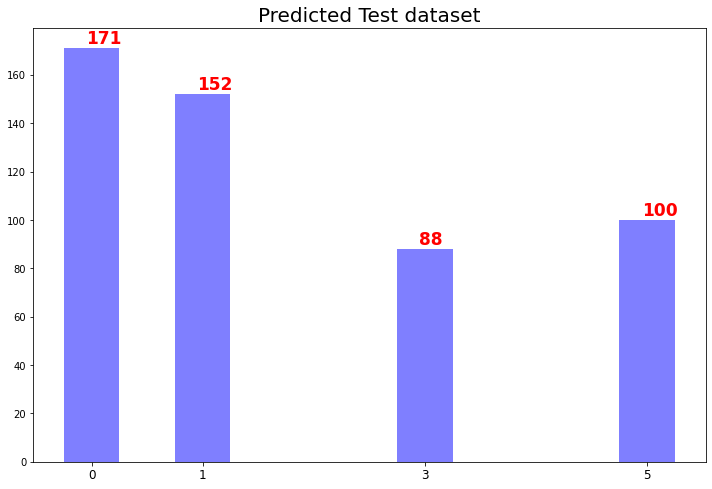

In [125]:
feature = submit['label']

plt.figure(figsize=(10,7.5))
plt.title('Predicted Test dataset', fontsize=20)

temp = feature.value_counts()

font1 = {
    'color':  'red',
    'weight': 'bold',
    'size': 17,
}
# print(type(temp))
# temp = dict(temp)
print(temp)
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)

plt.text(-0.05, temp.values[0]+2, s=temp.values[0],fontdict=font1)
plt.text(0.95, temp.values[1]+2, s=temp.values[1],fontdict=font1)
plt.text(4.95, temp.values[2]+2, s=temp.values[2],fontdict=font1)
plt.text(2.95, temp.values[3]+2, s=temp.values[3],fontdict=font1)
# plt.text(3.95, temp.values[5]+20, s=temp.values[5],fontdict=font1)
# plt.text(4.95, temp.values[3]+20, s=temp.values[3],fontdict=font1)

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [31]:
# title drop
train_df = train_df.drop(columns=["title"])
train_df.head()

,comment,bias,hate,label
0,김태리 정말 연기잘해 진짜,none,none,0
1,공효진 발연기나이질생각이읍던데 왜계속주연일까,none,hate,1
2,누구처럼 돈만 밝히는 저급인생은 살아가지마시길~~ 행복은 머니순이 아니니깐 작은거에...,others,hate,3
3,일본 축구 져라,none,none,0
4,난 절대로 임현주 욕하는인간이랑은 안논다 @.@,none,none,0


In [65]:
test_df.head()
test_df["comment"].head()

0                                        둘다 넘 좋다~행복하세요
1                 근데 만원이하는 현금결제만 하라고 써놓은집 우리나라에 엄청 많은데
2                                              누군데 얘네?
3    쑈 하지마라 짜식아!음주 1번은 실수, 2번은 고의, 3번은 인간쓰레기다.슬금슬금 ...
4    안검하수 가지고 있는 분께 희망을 주고 싶은건가요? 수술하면 이렇게 자연스러워진다고...
Name: comment, dtype: object

In [126]:
import re

bias_gender = list()

for idx, strings in enumerate(test_df["comment"]):
    if "남자" in strings or "여자" in strings:
        bias_gender.append(idx)

# bias_gender
        
    

In [137]:
submit = pd.read_csv("/USER/3_WEEK/MNC_NLP/submit/submit1.csv")
submit.head()

,ID,bias,hate
0,0,none,none
1,1,none,none
2,2,none,hate
3,3,others,hate
4,4,others,hate


In [108]:
for i in bias_gender:
    # if submit.iloc[i]["bias"] != "gender":
    #     print(i)
    if submit.iloc[i]["bias"] == "gender":
        print(f'{i:3d} |{test_df.iloc[i]["comment"]} | {submit.iloc[i]["bias"]} {submit.iloc[i]["hate"]}')
        # print(submit.iloc[i]["comment"])


  8 |여자같다 어깨도 너무좁고 뜨긴글럿네 | gender hate
 20 |제2 3의 피해자가 안나오면 꽃뱀인거네 남자란 족속들은 그냥 할수 있으면 하는구나인간이란 종자가 드럽다 | gender hate
 31 |여자는 역시 나이어린게최고지 30살넘음 폐기물 ㅇㅈ? | gender hate
 35 |아따 그라제 남자가 여자 만지면 성추행 여자가 남자만지면 장난이제 ~~암 그라제잉~~ | gender hate
 49 |에휴....남자는 나이 많아도 상관없지만 여자는 ....ㅠㅠ1년 바짝 난자 모으시는데 집중하시고 시술 성공하시길!! | gender hate
 56 |기사의 내용과는 무관하지만... 못생겼거나 성적 매력이 없는 여자들은 모두 전재산 국고로 환수 시키고 무인도에 갖다 버려져야 마땅하다 | gender hate
 61 |왜이제서야 확뜨신겁니꼬.넘웃기고.여자들한테인기많을스타일인데 7년이나한결같이연애를ㅡㅡ | gender hate
 63 |여자들 지금 북한 남자들하고 연애하고싶다고 난리임.ㅋㅋ | gender hate
 76 |일반인 남자들도 저런 대화 많이들 하더라 | gender hate
 78 |아무튼 남잘되는 꼴을 못봐요 그여자도 이상하다 | gender hate
126 |여자 30 넘으면 상폐인데 왜 자꾸 출연시켜라 하지.. 돈 없는 남자도 출연시키든가 | gender hate
133 |일반여자는 저렇게 하고 다니지 마라. 쇠파이프 맞는다 ㅋ | gender hate
142 |여자들은알지 우리가 10kg찌면 어떤상태인지를. 연예인이니깐 카메라렌즈위인데도 저정도인거고 저게저키의 표준체중임. 예쁘기만하고만 | gender hate
153 |여자들은 살려두면 안됀다는 참 교훈을 얻었다. | gender hate
161 |초딩몸매 좋기도 하겠다. 키가 한 150대 초반이면 몰라도...쫄쫄 굶는 아프리카 성인 여자도 몸무게 30키로 후반은 나가는데.. 성인 여자이고 키 160이상이면 적어도 50키로는 되야지. | gender hate
165 |저정도면

In [138]:
submit.iloc[432]

ID         432
bias    gender
hate      hate
Name: 432, dtype: object

In [139]:
submit.iloc[432] = [432, "gender", "none"]
submit.iloc[407] = [407, "gender", "none"]
submit.iloc[388] = [388, "gender", "none"]
submit.iloc[374] = [374, "gender", "none"]
submit.iloc[365] = [365, "gender", "none"]
submit.iloc[281] = [281, "gender", "none"]
submit.iloc[216] = [216, "gender", "none"]
submit.iloc[142] = [142, "gender", "none"]
submit.iloc[76] = [76, "gender", "none"]
submit.iloc[61] = [61, "gender", "none"]

In [140]:
submit.to_csv("/USER/3_WEEK/MNC_NLP/submit/asdf_1.csv")

In [87]:
test_df.iloc[124]["comment"]

'무도에서 조금 얻은 인기로 여자 만나고, 그러다 점점 일은 생겼고, 이제는 숨길수 없고, 바닥부터 올라가는척? 아닐까?'

In [88]:
test_df.iloc[152]["comment"]

'모든 여자연예인중 진심 제일 예쁨다고 생각함!'

In [89]:
test_df.iloc[173]["comment"]

'단골손님 여자분 넘 이쁘심'

In [90]:
test_df.iloc[269]["comment"]

'인격적으로나 연기로나 정말 완벽했던 남자였다'